# Generating custom model controlling car

In [ ]:
!nvidia-smi

Fri May 17 10:23:20 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
!pip install imgaug
from imgaug import augmenters as iaa
from imgaug import parameters as iap
import random
from sklearn.model_selection import train_test_split

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,Flatten, Dense, Dropout, MaxPooling2D, Lambda

!pip install livelossplot
from livelossplot import PlotLossesKeras

In [ ]:
X = np.load('X.npy')
y = np.load('y.npy')



In [ ]:
print(X.shape, y.shape)


(5778, 60, 80, 3) (5778,)


(array([9.000e+00, 1.000e+00, 4.000e+00, 0.000e+00, 5.000e+00, 4.000e+00,
        6.000e+00, 1.400e+01, 3.000e+01, 2.500e+01, 2.300e+01, 3.700e+01,
        5.000e+01, 4.100e+01, 4.300e+01, 6.400e+01, 1.170e+02, 1.475e+03,
        4.900e+01, 5.600e+01, 5.100e+01, 5.000e+01, 7.200e+01, 6.800e+01,
        5.900e+01, 1.530e+03, 5.600e+01, 4.800e+01, 4.900e+01, 6.200e+01,
        5.300e+01, 3.900e+01, 1.459e+03, 2.800e+01, 1.400e+01, 2.200e+01,
        1.200e+01, 8.000e+00, 8.000e+00, 7.000e+00, 6.000e+00, 8.000e+00,
        8.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 3.000e+00]),
 array([-1.4  , -1.344, -1.288, -1.232, -1.176, -1.12 , -1.064, -1.008,
        -0.952, -0.896, -0.84 , -0.784, -0.728, -0.672, -0.616, -0.56 ,
        -0.504, -0.448, -0.392, -0.336, -0.28 , -0.224, -0.168, -0.112,
        -0.056,  0.   ,  0.056,  0.112,  0.168,  0.224,  0.28 ,  0.336,
         0.392,  0.448,  0.504,  0.56 ,  0.616,  0.672,  0.728,  0.784,
         0.84 , 

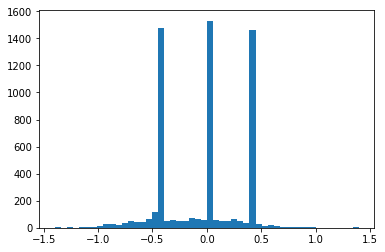

In [ ]:
plt.hist(y,50)

0.0


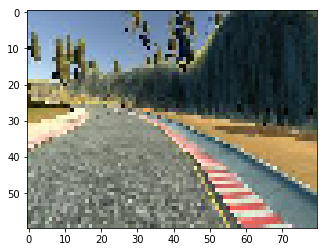

-0.8


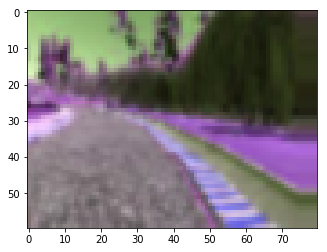

In [ ]:
def augment(img, steering_angle):
  #Flip
  if random.random() > 0.5:
    img = img[:, ::-1, :]
    steering_angle = -steering_angle
  blurer = iaa.GaussianBlur(iap.Uniform(0.1,1.0))
  img = blurer.augment_image(img)
  
  
  sh = iaa.ChannelShuffle(p=0.5)
  img = sh.augment_image(img)
  
  fog = iaa.Fog()
  fog.augment_image(img)
                             
  tx = random.randint(-20,20)
  translater = iaa.Affine(translate_px={"x":tx}, mode = "edge")
  img = translater.augment_image(img)
  steering_angle += tx*0.20
    
  return img, steering_angle

plt.imshow(X[0])
print(y[0])
plt.show();

img, angle = augment(X[0],y[0])
plt.imshow(img)
print(angle)
plt.show();

In [ ]:
X_train,X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(4622, 60, 80, 3) (4622,)
(1156, 60, 80, 3) (1156,)


In [ ]:
Xgen=[]
ygen=[]
for i in range(X_train.shape[0]):
  img,angle = augment(X[i],y[i])
  Xgen.append(img)
  ygen.append(angle)
  
Xgen = np.array(Xgen)
ygen = np.array(ygen)
print(Xgen.shape, ygen.shape)

(4622, 60, 80, 3) (4622,)


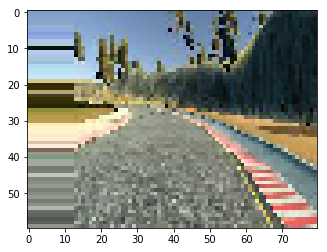

In [ ]:
plt.imshow(Xgen[0])

(array([  2.,   9.,  33.,  32.,  64.,  70., 115., 103., 128.,  97., 109.,
        102., 115., 106., 118., 115., 112., 106., 102., 122., 109.,  26.,
        129., 112., 126., 114., 131.,  96., 107., 127., 124., 109.,  99.,
         95., 131., 105., 101., 110., 132.,  97., 120.,  94., 105., 109.,
         80.,  93.,  37.,  35.,   5.,   4.]),
 array([-4.85 , -4.657, -4.464, -4.271, -4.078, -3.885, -3.692, -3.499,
        -3.306, -3.113, -2.92 , -2.727, -2.534, -2.341, -2.148, -1.955,
        -1.762, -1.569, -1.376, -1.183, -0.99 , -0.797, -0.604, -0.411,
        -0.218, -0.025,  0.168,  0.361,  0.554,  0.747,  0.94 ,  1.133,
         1.326,  1.519,  1.712,  1.905,  2.098,  2.291,  2.484,  2.677,
         2.87 ,  3.063,  3.256,  3.449,  3.642,  3.835,  4.028,  4.221,
         4.414,  4.607,  4.8  ]),
 <a list of 50 Patch objects>)

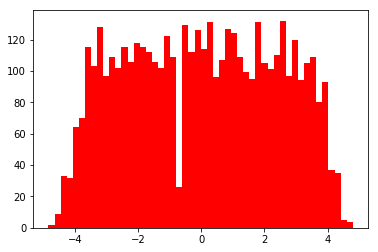

In [ ]:
# plt.hist(y_train,50, facecolor='green')
plt.hist(ygen,50, facecolor='red')

In [ ]:
def myModel(input_shape):
  model = Sequential([
      Lambda(lambda x: (x-128.0)/255.0, input_shape=input_shape, name='normalize'),
      Conv2D(64, (3,3), activation='relu'),
#     MaxPooling2D(poolsize=(2,2)),
      Conv2D(64, (3,3), activation='relu'),
      MaxPooling2D(pool_size=(2,2)),
      Conv2D(64, (3,3), activation='relu'),
      MaxPooling2D(pool_size=(2,2)),
      Conv2D(64, (3,3), activation='relu'),
      MaxPooling2D(pool_size=(2,2)),
      Dropout(rate=0.5),
      Flatten(),
      Dense(512, activation='relu'),
      Dropout(rate=0.3),
      Dense(512, activation='relu'),
      Dropout(rate=0.3),
      Dense(16, activation='relu'),
      Dense(1)
  ])
  return model

model = myModel(X[0].shape)
model.summary()
model.compile('adam','mse')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalize (Lambda)           (None, 60, 80, 3)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 58, 78, 64)        1792      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 56, 76, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 28, 38, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 26, 36, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 18, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 16, 64)        36928     
__________

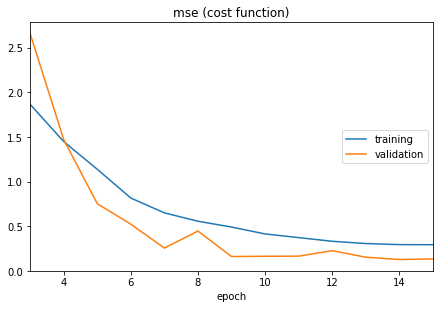

mse (cost function):
training   (min:    0.296, max:    4.830, cur:    0.296)
validation (min:    0.131, max:    3.726, cur:    0.137)


In [ ]:
batch_size = 512
epochs = 15

model.fit(Xgen, ygen,
         batch_size=batch_size,
         epochs = epochs,
         validation_data=(X_val, y_val),
         callbacks=[PlotLossesKeras()]
         )

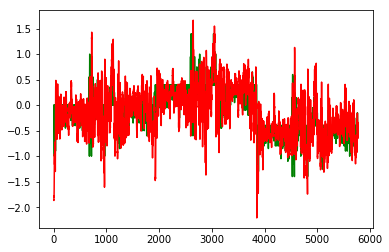

In [ ]:
ypred = model.predict(X)
plt.plot(y,'g',ypred,'r')
plt.show();

In [ ]:
model.save('mymodel.h5')

In [ ]:
!pip install autokeras

     |████████████████████████████████| 71kB 6.5MB/s 
     |████████████████████████████████| 26.6MB 1.7MB/s 
     |████████████████████████████████| 582.5MB 26kB/s 
     |████████████████████████████████| 61kB 17.8MB/s 
     |████████████████████████████████| 17.3MB 32.5MB/s 
     |████████████████████████████████| 5.4MB 35.3MB/s 
     |████████████████████████████████| 51kB 17.9MB/s 
     |████████████████████████████████| 3.3MB 39.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/be/a7/37/de16bfa1fbe42e7f5821c13719179ec511633fc772871e9a32
Successfully built autokeras
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.3
    Uninstalling numpy-1.16.3:
      Successfully uninstalled numpy-1.16.3
  Found existing installation: scipy 1.2.1
    Uninstalling scipy-1.2.1:

In [ ]:
import autokeras as ak

Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


In [ ]:
model_ak = ak.ImageRegressor(verbose = True)
model_ak.fit(Xgen, ygen, time_limit=5*60)

Saving Directory: /tmp/autokeras_WOUFGR
Preprocessing the images.
Preprocessing finished.

Initializing search.
Initialization finished.


+----------------------------------------------+
|               Training model 0               |
+----------------------------------------------+
                                                                                                    
No loss decrease after 5 epochs.


Saving model.
+--------------------------------------------------------------------------+
|        Model ID        |          Loss          |      Metric Value      |
+--------------------------------------------------------------------------+
|           0            |   21.197670459747314   |   5.976391268470668    |
+--------------------------------------------------------------------------+


+----------------------------------------------+
|               Training model 1               |
+----------------------------------------------+
Epoch-2, Current Metric - 6.02

KeyboardInterrupt: ignored

In [ ]:
!pip uninstall torch torchvision -y
!pip3 install https://download.pytorch.org/whl/cpu/torch-1.0.1-cp36-cp36m-win_amd64.whl
!pip3 install torchvision==0.2.1


Uninstalling torch-1.0.1.post2:
  Successfully uninstalled torch-1.0.1.post2
Uninstalling torchvision-0.2.1:
  Successfully uninstalled torchvision-0.2.1
ERROR: torch-1.0.1-cp36-cp36m-win_amd64.whl is not a supported wheel on this platform.
  Using cached https://files.pythonhosted.org/packages/ca/0d/f00b2885711e08bd71242ebe7b96561e6f6d01fdb4b9dcf4d37e2e13c5e1/torchvision-0.2.1-py2.py3-none-any.whl
     |████████████████████████████████| 676.9MB 22kB/s 
ERROR: autokeras 0.4.0 has requirement torch==1.0.1.post2, but you'll have torch 1.1.0 which is incompatible.


In [ ]:
score = model_ak.evaluate(X_val, y_val)
print(score)

In [ ]:
ypred = model_ak.predict(X)

In [ ]:
plt.plot(y,'g', ypred, 'r')
plt.show()

In [ ]:
model_ak.export_keras_model('autokreas.h5')

In [ ]:
model_ak.export_autokeras_model('autokreas.pk1')

In [ ]:
from autokeras.utils import pickle_from_file
model = pickle_from_file('model.pk1')

In [ ]:
yp = model.predict(X_val)